# Axion-electron coupling limits vs axion mass

Axion mass-PQ scale relation:
\begin{equation}
m_{a}=5.70(7) \mu \mathrm{eV}\left(\frac{10^{12} \,\mathrm{GeV}}{f_{a}}\right)
\end{equation}

Axion-electron coupling
\begin{equation}
g_{ae} \equiv \frac{C_{ae} m_{e}}{f_{a}}=8.943 \times 10^{-11} C_{ae}\frac{m_a}{\mathrm{eV}}
\end{equation}

Model dependent constant:
\begin{equation}
C_{ae}  = 
\begin{cases}
  2\times 10^{-4} & {\rm KSVZ} \\
  [0.024,\frac{1}{3}] & {\rm DFSZ\,I} \\
  [-\frac{1}{3},0] & {\rm DFSZ\,II}
\end{cases}
\end{equation}
In DFSZ the lepton mass can come from either coupling to $H_u$ or $H_d$, so $C_{ae} = -C_{au}$ or $C_{ad}$. The range of values for DFSZ I and II come from the perturbativity of the Yukawa couplings with sets the range $0.28<v_{u} / v_{d}<140$ for the Higgs vevs.

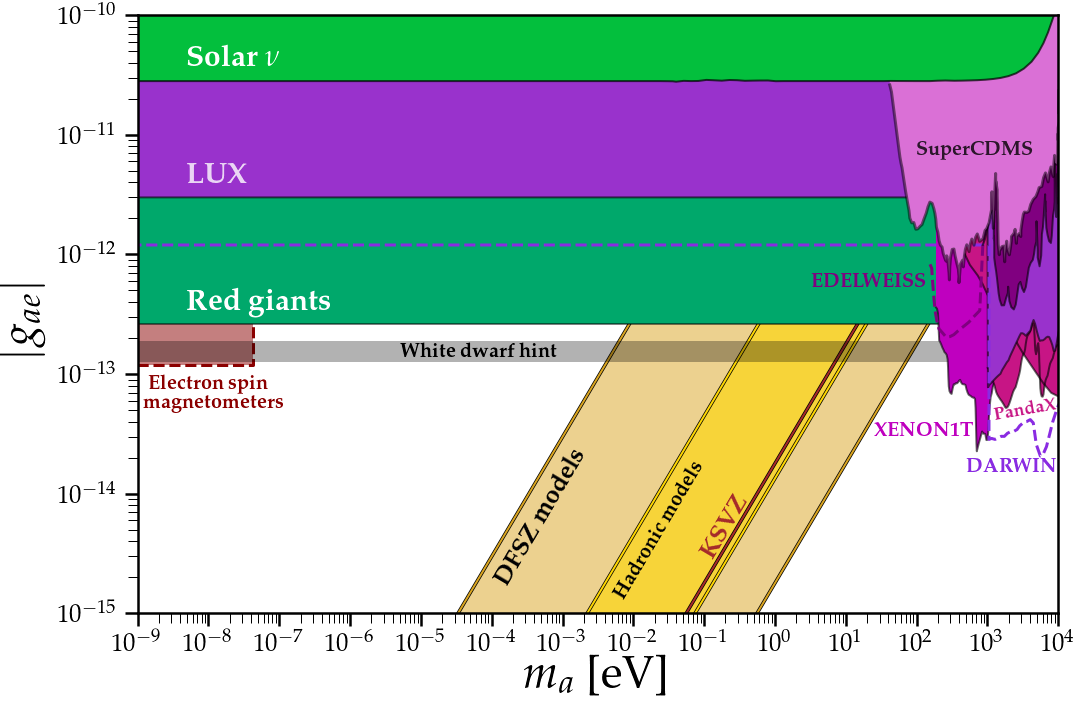

In [2]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import norm
import matplotlib as mpl

#==============================================================================#
#==============================================================================#
class AxionElectron():
    def FigSetup(xlab=r'$m_a$ [eV]',ylab='$|g_{ae}|$',\
                     g_min = 1.0e-15,g_max = 1.0e-10,\
                     m_min = 1.0e-9,m_max = 1.0e4,\
                     lw=2.5,lfs=45,tfs=25,tickdir='out',\
                     Grid=False,Shape='Rectangular',mathpazo=False,
                     TopAndRightTicks=False):

            plt.rcParams['axes.linewidth'] = lw
            plt.rc('text', usetex=True)
            plt.rc('font', family='serif',size=tfs)

            if mathpazo:
                mpl.rcParams['text.latex.preamble'] = [r'\usepackage{mathpazo}']

            if Shape=='Wide':
                fig = plt.figure(figsize=(16.5,5))
            elif Shape=='Rectangular':
                fig = plt.figure(figsize=(16.5,11))

            ax = fig.add_subplot(111)

            ax.set_xlabel(xlab,fontsize=lfs)
            ax.set_ylabel(ylab,fontsize=lfs)

            ax.tick_params(which='major',direction=tickdir,width=2.5,length=13,right=TopAndRightTicks,top=TopAndRightTicks,pad=7)
            ax.tick_params(which='minor',direction=tickdir,width=1,length=10,right=TopAndRightTicks,top=TopAndRightTicks)


            ax.set_yscale('log')
            ax.set_xscale('log')
            ax.set_xlim([m_min,m_max])
            ax.set_ylim([g_min,g_max])

            locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=50)
            locmin = mpl.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
            ax.xaxis.set_major_locator(locmaj)
            ax.xaxis.set_minor_locator(locmin)
            ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

            locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
            locmin = mpl.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
            ax.yaxis.set_major_locator(locmaj)
            ax.yaxis.set_minor_locator(locmin)
            ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

            if Grid:
                ax.grid(zorder=0)
            return fig,ax

    def QCDAxion(ax,coupling='Photon',
                      C_logwidth=10,KSVZ_on=True,DFSZ_on=True,Hadronic_on=True,
                      cmap='YlOrBr',fs=25):
        ## QCD Axion band:
        g_min,g_max = ax.get_ylim()
        m_min,m_max = ax.get_xlim()

        # Mass-coupling relation
        def g_x(C_ae,m_a):
            return 8.943e-11*C_ae*m_a
        DFSZ_u = 1.0/3.0
        DFSZ_l = 2.0e-5
        KSVZ = 2e-4
        Had_u = 5e-3
        Had_l = 1.5e-4
        
        # QCD Axion models
        n = 200
        m = logspace(log10(m_min),log10(m_max),n)
        rot = 45.0
        trans_angle = plt.gca().transData.transform_angles(array((rot,)),array([[0, 0]]))[0]
        if DFSZ_on:
            col = 'goldenrod'
            plt.fill_between(m,g_x(DFSZ_l,m),y2=g_x(DFSZ_u,m),facecolor=col,zorder=0,alpha=0.5)
            plt.plot(m,g_x(DFSZ_l,m),'k-',lw=3.5,zorder=0)
            plt.plot(m,g_x(DFSZ_u,m),'k-',lw=3.5,zorder=0)
            plt.plot(m,g_x(DFSZ_l,m),'-',lw=2,zorder=0,color=col)
            plt.plot(m,g_x(DFSZ_u,m),'-',lw=2,zorder=0,color=col)
            plt.text(1e-4,g_x(DFSZ_u,1e-4)/1.5,r'{\bf DFSZ models}',fontsize=fs,rotation=trans_angle,color='k',ha='left',va='top',rotation_mode='anchor')
        if KSVZ_on:
            col = 'brown'
            plt.plot(m,g_x(KSVZ,m),'k-',lw=3.5,zorder=0.02)
            plt.plot(m,g_x(KSVZ,m),'-',lw=2,zorder=0.02,color=col)
            plt.text(0.8e-1,g_x(KSVZ,0.8e-1)*2.3,r'{\bf KSVZ}',fontsize=fs,rotation=trans_angle,color=col,ha='left',va='top',rotation_mode='anchor')
        if Hadronic_on:
            col = 'gold'
            plt.fill_between(m,g_x(Had_l,m),y2=g_x(Had_u,m),facecolor=col,zorder=0.01,alpha=0.6)
            plt.plot(m,g_x(Had_l,m),'k-',lw=3.5,zorder=0.01)
            plt.plot(m,g_x(Had_u,m),'k-',lw=3.5,zorder=0.01)
            plt.plot(m,g_x(Had_l,m),'-',lw=2,zorder=0.01,color=col)
            plt.plot(m,g_x(Had_u,m),'-',lw=2,zorder=0.01,color=col)
            plt.text(5e-3,g_x(Had_u,5e-3)/1.5,r'{\bf Hadronic models}',fontsize=fs-5,rotation=trans_angle,color='k',ha='left',va='top',rotation_mode='anchor')

        return
    
    def XENON1T(ax,col='m',fs=20):
        # XENON1T LDM Searches arXiv:[1907.11485]
        y2 = ax.get_ylim()[1]
        dat = loadtxt("limit_data/AxionElectron/XENON1T.txt")
        plt.plot(dat[:,0],dat[:,1],'k-',alpha=0.6,zorder=0.51,lw=2)
        plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.51)
        plt.text(0.25e2,4e-14,r'{\bf XENON1T}',fontsize=fs,color=col,ha='left',va='top')
        return

    def LUX(ax,col='darkorchid',fs=20):
        # LUX arXiv:[1704.02297]
        y2 = ax.get_ylim()[1]
        dat = loadtxt("limit_data/AxionElectron/LUX.txt")
        plt.plot(dat[:,0],dat[:,1],'k-',alpha=0.6,zorder=0.53,lw=2)
        plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.53)
        plt.text(0.5e-8,6e-12,r'{\bf LUX}',fontsize=30,color='w',alpha=0.8,ha='left',va='top')
        return
    
    def PandaX(ax,col='mediumvioletred',fs=20):
        # PandaX arXiv:[1707.07921]
        y2 = ax.get_ylim()[1]
        dat = loadtxt("limit_data/AxionElectron/PandaX_Solar.txt")
        plt.plot(dat[:,0],dat[:,1],'k-',alpha=0.6,zorder=0.52,lw=2)
        plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.52)
        dat = loadtxt("limit_data/AxionElectron/PandaX.txt")
        plt.plot(dat[:,0],dat[:,1],'k-',alpha=0.6,zorder=0.52,lw=2)
        plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.52)
        plt.text(1.2e3,6.5e-14,r'{\bf PandaX}',fontsize=fs-2,color=col,ha='left',va='top',rotation=10)
        return
    
    def EDELWEISS(ax,col='purple',projection=True,fs=20):
        # EDELWEISS arXiv:[1808.02340]
        y2 = ax.get_ylim()[1]
        dat = loadtxt("limit_data/AxionElectron/EDELWEISS.txt")
        plt.plot(dat[:,0],dat[:,1],'k-',alpha=0.6,zorder=0.57,lw=2)
        plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.57)
        if projection:
            dat = loadtxt("limit_data/AxionElectron/Projections/EDELWEISS.txt")
            plt.plot(dat[:,0],dat[:,1],'--',color=col,zorder=0.56,lw=3)
        plt.text(3.2e0,7e-13,r'{\bf EDELWEISS}',fontsize=fs,color=col,ha='left',va='top')
        return
    
    def SuperCDMS(ax,col='orchid',fs=20):
        # SuperCDMS arXiv:[1911.11905]
        y2 = ax.get_ylim()[1]
        dat = loadtxt("limit_data/AxionElectron/SuperCDMS.txt")
        plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.58)
        plt.plot(dat[:,0],dat[:,1],'-',color='k',alpha=0.5,zorder=0.58,lw=3)
        plt.text(1e2,9e-12,r'{\bf SuperCDMS}',fontsize=fs,color='k',ha='left',va='top',alpha=0.8)
        return
    
    def DARWIN(ax,col='blueviolet',fs=20):
        # PandaX arXiv:[1606.07001]
        y2 = ax.get_ylim()[1]
        dat = loadtxt("limit_data/AxionElectron/Projections/DARWIN.txt")
        plt.plot(dat[:,0],dat[:,1],'--',color=col,alpha=1.0,zorder=0.55,lw=3)
        plt.text(0.5e3,2e-14,r'{\bf DARWIN}',fontsize=fs,color=col,ha='left',va='top')
        return
    
    def UndergroundDetectors(ax,projection=True,fs=20):
        AxionElectron.LUX(ax,fs=fs)
        AxionElectron.PandaX(ax,fs=fs)
        AxionElectron.XENON1T(ax,fs=fs)
        AxionElectron.SuperCDMS(ax,fs=fs)
        AxionElectron.EDELWEISS(ax,fs=fs,projection=projection)
        if projection:
            AxionElectron.DARWIN(ax,fs=fs)
        return
    
    def ElectronSpinMagnetometers(ax,col = 'darkred',fs=20):
        # Lawson et al. Reference: arXiv:[in preparation]
        y2 = ax.get_ylim()[1]
        dat = loadtxt("limit_data/AxionElectron/Projections/ElectronSpinMagnetometers.txt")
        plt.plot(dat[:,0],dat[:,1],'--',color=col,alpha=1.0,zorder=0,lw=3)
        plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0,alpha=0.5)
        plt.text(1.4e-9,1e-13,r'{\bf Electron spin}',fontsize=fs,color=col,ha='left',va='top')
        plt.text(1.2e-9,0.7e-13,r'{\bf magnetometers}',fontsize=fs,color=col,ha='left',va='top')
        return

    def Haloscopes(ax,projection=True,fs=20):
        #AxionPhoton.ADMX(ax,projection=projection,fs=fs)
        if projection:
            AxionElectron.ElectronSpinMagnetometers(ax)
        return
    

    def AstroBounds(ax,projection=True,fs=15):
        y2 = ax.get_ylim()[1]
        ### Astrophysical constraints
        return

    def Cosmology(ax,fs=30):
        y2 = ax.get_ylim()[1]
        ## Cosmology constraints

    def StellarBounds(ax,fs=30,Hint=True):
        y2 = ax.get_ylim()[1]
        # Stellar physics constraints
        # Red Giants arXiv:[1708.02111]
        RG_col = [0.0, 0.66, 0.42]
        dat = loadtxt("limit_data/AxionElectron/RedGiants.txt")
        plt.plot(dat[:,0],dat[:,1],color='k',alpha=0.5,zorder=0.5,lw=2)
        plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=RG_col,zorder=0.5)
        plt.text(0.5e-8,3.5e-13,r'{\bf Red giants}',fontsize=fs,color='w')
        
        # Solar neutrinos arXiv:[0807.2926]
        SolarNu_col = [0.01, 0.75, 0.24]
        SolarNu = loadtxt("limit_data/AxionElectron/SolarNu.txt")
        plt.plot(SolarNu[:,0],SolarNu[:,1],color='k',lw=2,alpha=0.7,zorder=1)
        plt.fill_between(SolarNu[:,0],SolarNu[:,1],y2=y2,edgecolor=None,facecolor=SolarNu_col,zorder=0.7)
        plt.text(0.5e-8,3.8e-11,r'{\bf Solar} $\nu$',fontsize=fs,color='w')
        
        if Hint:
            # White dwarf hint arXiv:[1708.02111]
            col = 'k'
            dat = loadtxt("limit_data/AxionElectron/WDhint.txt")
            plt.fill_between(dat[:,0],dat[:,1],color=col,edgecolor=None,lw=0.001,zorder=0.1,alpha=0.3)
            plt.text(5e-6,1.4e-13,r'{\bf White dwarf hint}',fontsize=fs-10)

#==============================================================================#
#==============================================================================#

%matplotlib inline
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import norm
import matplotlib as mpl
from PlotFuncs import *

fig,ax = AxionElectron.FigSetup(Shape='Rectangular',mathpazo=True)
AxionElectron.QCDAxion(ax)
AxionElectron.UndergroundDetectors(ax,projection=True)
AxionElectron.Haloscopes(ax,projection=True)
AxionElectron.StellarBounds(ax)
MySaveFig(fig,'AxionElectron')
